In [4]:
# import necessary modules 
import pandas as pd    
import matplotlib.pyplot as plt
from IPython.display import display

<p>Let us start by reading in the <code>colors</code> data to get a sense of the diversity of Lego sets!</p>

In [6]:
# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
display(colors.head())

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


### Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [7]:
# How many distinct colors are available?
num_colors = colors.shape[0]

# Print num_colors
print(num_colors)

135


### 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. <br>It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [9]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()

display(colors_summary)

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


### 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. <br>It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

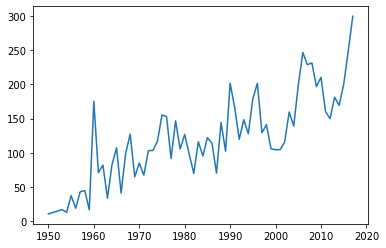

In [11]:
# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets.groupby('year').mean()['num_parts']

# Plot trends in average number of parts by year
plt.plot(parts_by_year)
plt.show()

### 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. <br>Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [12]:
themes_by_year = sets.groupby('year').count()[['theme_id']]

display(themes_by_year.head())

,theme_id
year,
1950,7
1953,4
1954,14
1955,28
1956,12


### 7. Wrapping It All Up!
<p>Before we wrap up, let's take a closer look at the <code>themes_by_year</code> DataFrame.</p>

In [18]:
# Get the number of unique themes released in 1999
num_themes = themes_by_year.loc[1999]
# Print the number of unique themes released in 1999
display(num_themes)

theme_id    300
Name: 1999, dtype: int64